# User Profiling and Segmentation

- **User ID:** Unique identifier for each user.
- **Age:** Age range of the user.
- **Gender:** Gender of the user.
- **Location:** User’s location type (Urban, Suburban, Rural).
- **Language:** Primary language of the user.
- **Education Level:** Highest education level achieved.
- **Likes and Reactions:** Number of likes and reactions a user has made.
- **Followed Accounts:** Number of accounts a user follows.
- **Device Usage:** Primary device used for accessing the platform (Mobile, Desktop, Tablet).
- **Time Spent Online (hrs/weekday):**Average hours spent online on weekdays.
- **Time Spent Online (hrs/weekend):** Average hours spent online on weekends.
- **Click-Through Rates (CTR):** The percentage of ad impressions that lead to clicks.
- **Conversion Rates:** The percentage of clicks that lead to conversions/actions.
- **Ad Interaction Time (sec):** Average time spent interacting with ads in seconds.
- **Income Level:** User’s income level.
- **Top Interests:** Primary interests of the user.

In [3]:
# We import the libreries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from collections import Counter 
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [4]:
# We import the dataset
df = pd.read_csv('../data/user_profiles_for_ads.csv')

# Print the first rows of the dataset
df.head()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts"
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G..."


In [5]:
# Print some general info of our dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   User ID                          1000 non-null   int64  
 1   Age                              1000 non-null   object 
 2   Gender                           1000 non-null   object 
 3   Location                         1000 non-null   object 
 4   Language                         1000 non-null   object 
 5   Education Level                  1000 non-null   object 
 6   Likes and Reactions              1000 non-null   int64  
 7   Followed Accounts                1000 non-null   int64  
 8   Device Usage                     1000 non-null   object 
 9   Time Spent Online (hrs/weekday)  1000 non-null   float64
 10  Time Spent Online (hrs/weekend)  1000 non-null   float64
 11  Click-Through Rates (CTR)        1000 non-null   float64
 12  Conversion Rates     

In [6]:
# We print some descriptive estatistics 
df.describe(include='all')

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000
unique,NaN,6,2,3,4,5,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,6,680
top,NaN,25-34,Female,Urban,English,Technical,NaN,NaN,Desktop Only,NaN,NaN,NaN,NaN,NaN,100k+,Investing and Finance
freq,NaN,255,506,350,258,211,NaN,NaN,262,NaN,NaN,NaN,NaN,NaN,176,23
mean,500.500000,NaN,NaN,NaN,NaN,NaN,4997.084000,251.438000,NaN,2.757500,4.601600,0.125333,0.049805,91.425000,NaN,NaN
std,288.819436,NaN,NaN,NaN,NaN,NaN,2838.494365,141.941557,NaN,1.279735,2.026234,0.071187,0.028670,51.497965,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,101.000000,10.000000,NaN,0.500000,1.000000,0.000000,0.000000,5.000000,NaN,NaN
25%,250.750000,NaN,NaN,NaN,NaN,NaN,2661.250000,126.000000,NaN,1.700000,2.900000,0.065000,0.026000,45.750000,NaN,NaN
50%,500.500000,NaN,NaN,NaN,NaN,NaN,5002.500000,245.500000,NaN,2.800000,4.700000,0.128000,0.049000,90.000000,NaN,NaN
75%,750.250000,NaN,NaN,NaN,NaN,NaN,7348.750000,377.000000,NaN,3.800000,6.400000,0.186000,0.073000,137.250000,NaN,NaN


**Initial Observations**

- We have a total of 16 characteristics and 1000 observations in our dataset.
Nine of our 16 columns contain numerical values, including integers and floats. The other 7 contain strings or categorical data.
- We don't have missing information
- We have demographic and behavioral information that will be important for segmenting our clients into different groups.
From our summary statistics, we learn that the maximum amount of time spent online during a weekday is 5 hours, and the minimum amount is 30 minutes.
- We also see that during the weekend, the amount of time spent online increases. The maximum amount increases to 8 hours, and the minimum amount increases to 1 hour.
- We have 6 different age categories, 3 different locations, 4 different languages, 4 different types of devices used by our clients, and 6 different income categories.
- We'll create some graphics to better understand the data presented above.

# Demographics

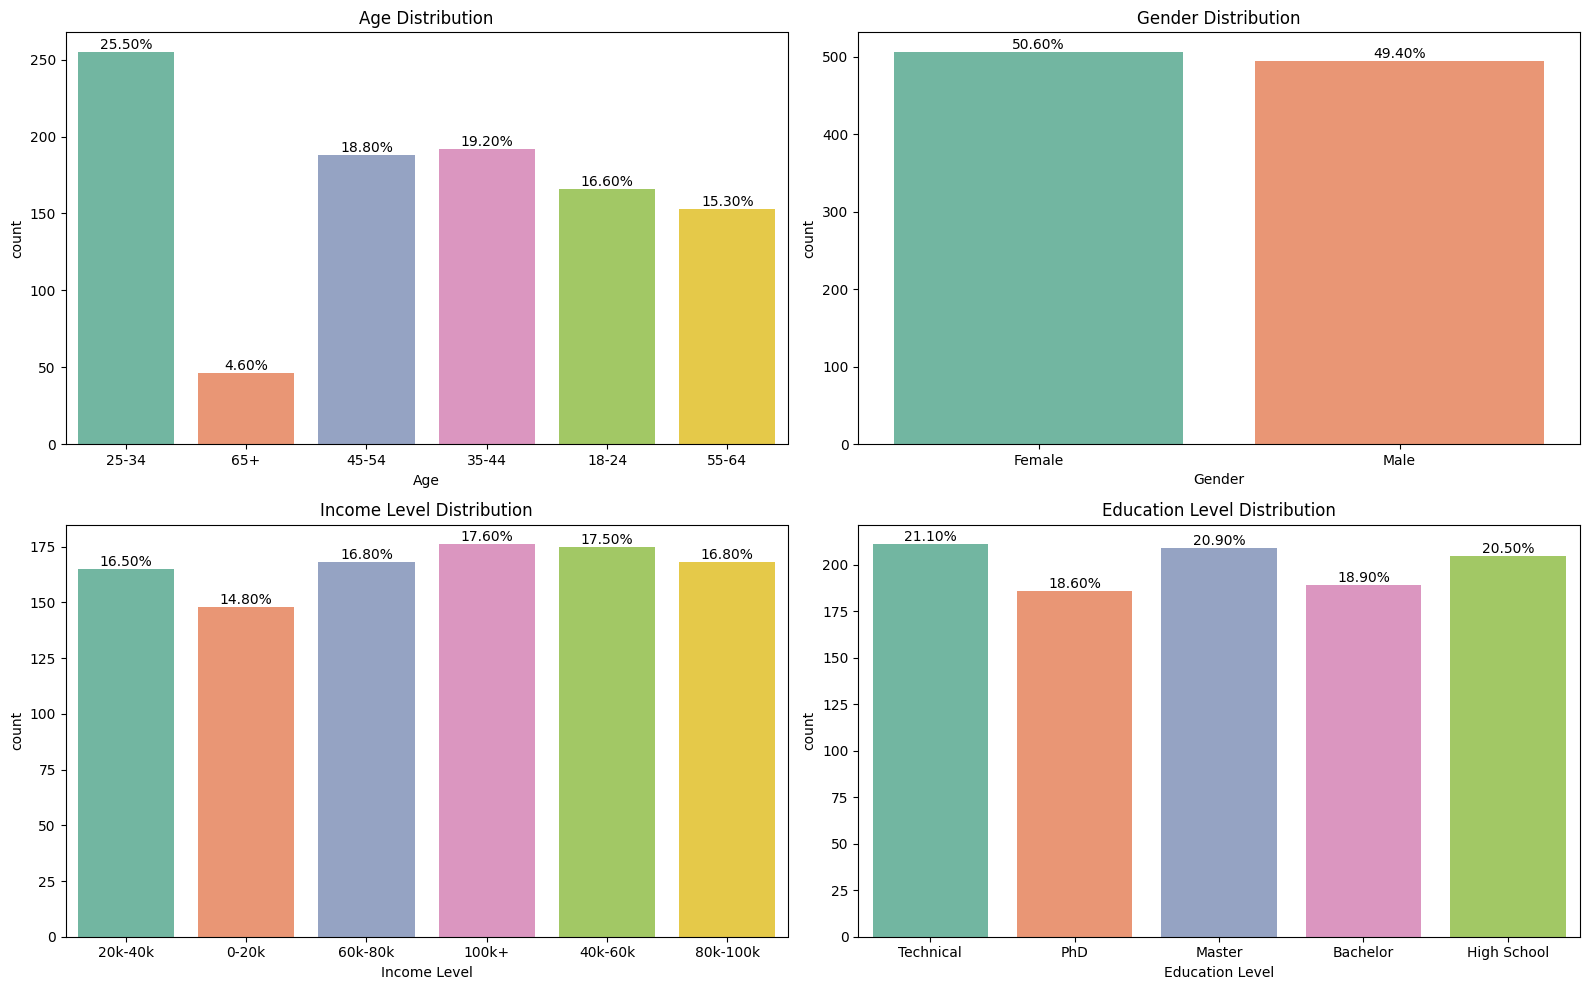

In [7]:
fig, axes = plt.subplots(2,2,figsize=(16,10))
for idx, column in enumerate(['Age','Gender', 'Income Level', 'Education Level']):
    i = idx // 2
    k = idx % 2
    axis = sns.countplot(x= column, data=df, palette='Set2', hue=column, legend=False, ax=axes[i,k])
    axis.set_title(f'{column} Distribution')
    for p in axis.patches:
        height = p.get_height()
        percentage = '{:.2%}'.format(height / len(df))
        axis.annotate(f'{percentage}',(p.get_x() + p.get_width()/2.,height), ha='center',va='bottom')

plt.tight_layout()
plt.show()

# Behavioural

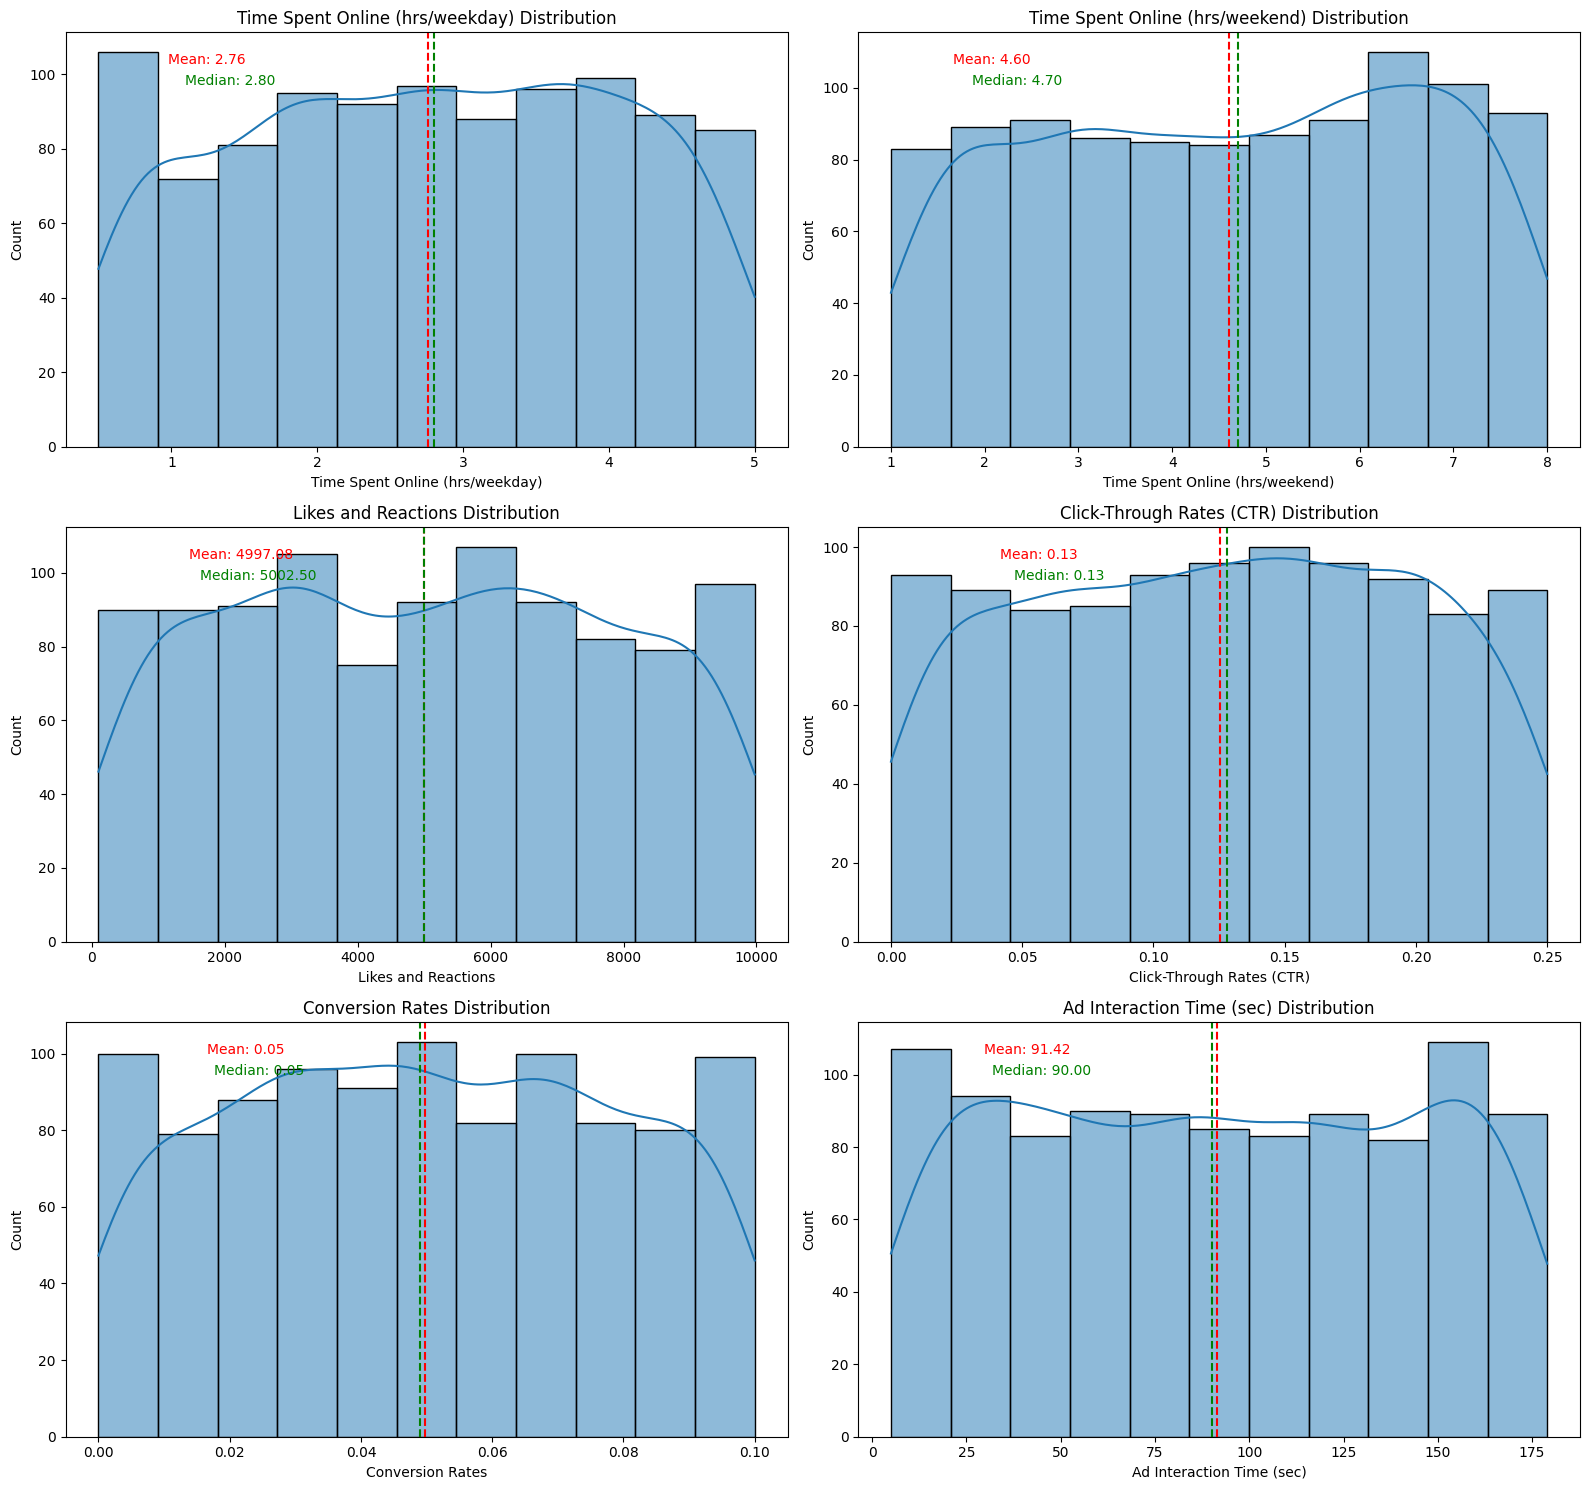

In [8]:
fig, axes = plt.subplots(3,2,figsize = (16,15)) # We create a firgure with subplots 

for idx,column in enumerate(['Time Spent Online (hrs/weekday)','Time Spent Online (hrs/weekend)','Likes and Reactions',
                              'Click-Through Rates (CTR)', 'Conversion Rates','Ad Interaction Time (sec)']):
    i = idx //2 # this give us the first index of the position of our subplots
    j = idx %2 # this give us the second index of the position of our subplots
    axis = sns.histplot(x=column,data=df,ax=axes[i,j],kde=True) # We create the graph
    mean_value = df[column].mean() # We calculate the mean
    mean_y_position = axis.get_ylim()[1] * 0.95
    axis.axvline(mean_value, color= 'r',linestyle='--') # We add the mean to the graph
    axis.text((mean_value * 0.45),mean_y_position, f'Mean: {mean_value:.2f}',color='red', ha='center', va='top')
    median_value = df[column].median() # We calculate the median
    median_y_position = axis.get_ylim()[1] * 0.9
    axis.axvline(median_value, color= 'g',linestyle='--') # We add the median to the graph
    axis.text((median_value * 0.5),median_y_position, f'Median: {median_value:.2f}',color='green', ha='center', va='top')

    axis.set_title(f'{column} Distribution') # We set the graph tittle

plt.tight_layout()
plt.show()

# Clients' Preferences

Text(0.5, 0, 'Frequency')

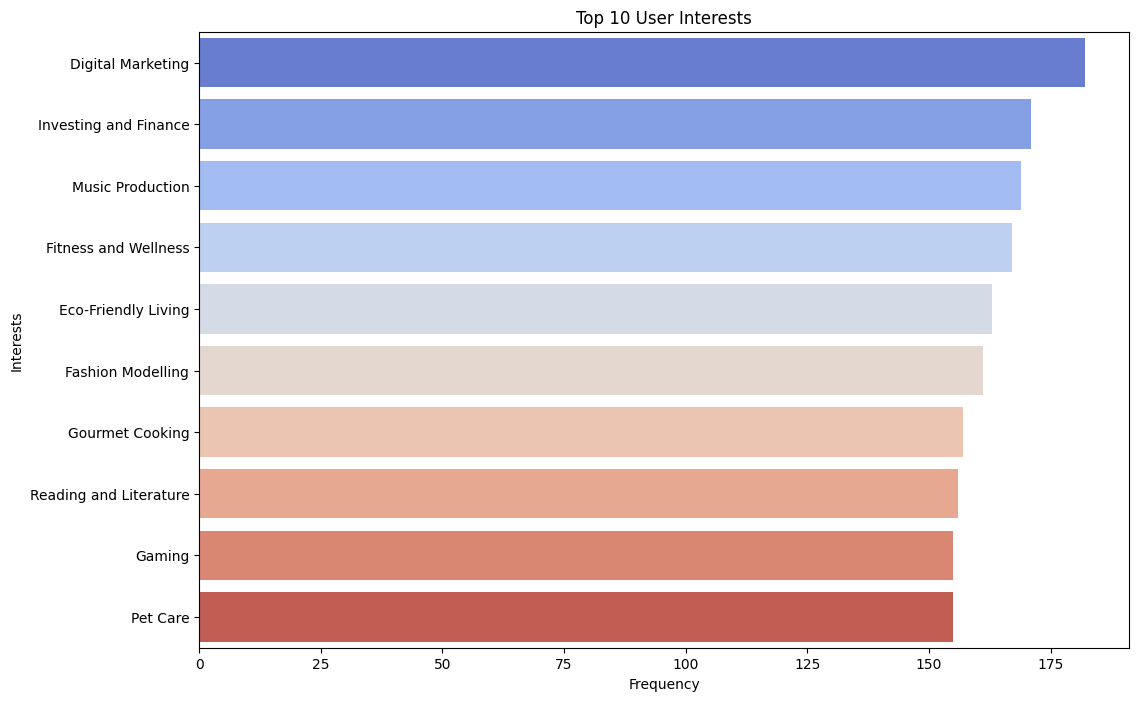

In [9]:
instersts_list = df['Top Interests'].str.split(', ').sum()
interest_counter = Counter(instersts_list)
interests_df = pd.DataFrame(interest_counter.items(),columns=['Interests','Frequency']).sort_values(by='Frequency',ascending=False)

# plotting the most common interests
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Interests', data=interests_df.head(10),hue='Interests', palette='coolwarm')
plt.title('Top 10 User Interests')
plt.xlabel('Frequency')

## Insights from our graphs

**Categorical Data**

- 25.50% of our dataset are people between 25 and 34 years old.
- 50.60% of our dataset are women.
- 17.60% of our dataset have an income greater than 100k.
- 21.10% of our dataset have a technical educational level.

**Behavioral Data**

- The mean amount of time spent online during a weekday is of 2.76 hours.
- The mean amount of time spent online during a weekend is of 4.6 hours.
- The mean amount of likes and reactions per client is 4997.
- The top 5 client's interests are Digital Marketing, Investing-Finance, Music production, Fitness-Wellness, and Eco Friendy living. 

## Segmentation using clustering algorithms

In [10]:
# Selecting features for clustering
cluster_features = ['Age','Gender','Location','Time Spent Online (hrs/weekday)','Income Level',
                    'Time Spent Online (hrs/weekend)','Click-Through Rates (CTR)', 'Conversion Rates']
clustering_df = df[cluster_features]

# Defining preprocessing for numerical and categorical features

num_features = ['Time Spent Online (hrs/weekday)',
                    'Time Spent Online (hrs/weekend)','Click-Through Rates (CTR)', 'Conversion Rates']
num_transformer = RobustScaler()

cat_features = ['Age','Gender','Location','Income Level']
cat_transformer = OneHotEncoder()

# Combining processing steps

pipeline = Pipeline(steps = [('preprocessor',ColumnTransformer(
    transformers = [
        ('num', num_transformer, num_features),
        ('cat',cat_transformer,cat_features)
    ])),
    ('cluster',KMeans(n_clusters=5,random_state= 42))])

pipeline.fit(clustering_df)

cluster_labels = pipeline.named_steps['cluster'].labels_
df['clusters'] = cluster_labels

In [11]:
df.head()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests,clusters
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing,3
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science,2
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness,3
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts",0
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G...",4


In [12]:
# Calculating mean values for numerical features for each cluster

cluster_means = df.groupby('clusters')[num_features].mean()
def calculate_mode(group):
    return group[cat_features].mode().iloc[0]

mode_series  = df.groupby('clusters',).apply(calculate_mode,include_groups=False)
cluster_means[cat_features] = mode_series
cluster_means

,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Age,Gender,Location,Income Level
clusters,,,,,,,,
0,2.832000,4.838667,0.129640,0.050040,25-34,Female,Rural,80k-100k
1,2.741071,4.836905,0.127107,0.048268,25-34,Male,Rural,40k-60k
2,2.758896,4.436503,0.125920,0.049175,25-34,Male,Urban,60k-80k
3,2.802235,4.446927,0.126101,0.051827,25-34,Female,Suburban,100k+
4,2.662147,4.637853,0.118141,0.050181,25-34,Female,Urban,40k-60k


In [13]:
# preparing data to plot
features_plot = ['Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)',
                  'Likes and Reactions', 'Click-Through Rates (CTR)']
labels = np.array(features_plot)

# Dataframe to plot

df_plot = df[features_plot].reset_index()

# normalizing the data

df_plot_normalized = df_plot.copy()
for feature in features_plot:
    df_plot_normalized[feature] = (
        df_plot[feature] - df_plot[feature].min()) / (df_plot[feature].max() - df_plot[feature].min())
    
# Add a full circle for ploting
df_plot_normalized = pd.concat([df_plot_normalized, df_plot_normalized.iloc[0:1]], ignore_index=True)

# assigning names to segments
segment_names = ['Weekend Warriors', 'Engaged Professionals', 'Low-Key Users', 'Active Explorers', 'Budget Browsers']

fig = go.Figure()

# Loop through each segment to add to the radar chart
for i, segment in enumerate(segment_names):
    fig.add_trace(go.Scatterpolar(
        r=np.append(df_plot_normalized.iloc[i][features_plot].values, df_plot_normalized.iloc[i][features_plot].values[0]),  # Append first value to close the radar chart
        theta=np.append(labels, labels[0]),  # Append first label to close the radar chart
        fill='toself',
        name=segment,
        hoverinfo='text',
        text=[f"{label}: {value:.2f}" for label, value in zip(features_plot, df_plot_normalized.iloc[i][features_plot])] + [f"{labels[0]}: {df_plot_normalized.iloc[i][features_plot][0]:.2f}"]  # Adding hover text
    ))

# Update the layout to finalize the radar chart
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )
    ),
    showlegend=True,
    legend=dict(
        orientation="h",
        x=0.5,
        y=-0.15,
        xanchor="center",
        yanchor="bottom"
    ),
    title='User Segments Profile',
    margin=dict(l=50, r=50, t=70, b=50)  # Adjust margins for better layout
)

fig.show()

C:\Users\ZonaDigital\AppData\Local\Temp\ipykernel_8144\1598936986.py:33: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\ZonaDigital\AppData\Local\Temp\ipykernel_8144\1598936986.py:33: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\ZonaDigital\AppData\Local\Temp\ipykernel_8144\1598936986.py:33: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\ZonaDigital\AppData\Local\Temp\ipykernel_8144\1598936986.py:33: Future